In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,cross_val_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


***If we want to use K-means Clustering, it's important to do scaling before***

### Normalization

In [4]:
df_normalized = df.copy()

In [5]:
scaler_mm = MinMaxScaler()

df_normalized['Income($)'] = scaler_mm.fit_transform(df_normalized[['Income($)']])
df_normalized['Age'] = scaler_mm.fit_transform(df_normalized[['Age']])

### Standardization

In [6]:
df_standardized = df.copy()

In [7]:
scaler_sd = StandardScaler()

df_standardized['Income($)'] = scaler_sd.fit_transform(df_standardized[['Income($)']])
df_standardized['Age'] = scaler_sd.fit_transform(df_standardized[['Age']])

### K-means Clustering

In [8]:
km = KMeans(n_clusters=3)

cluster = km.fit_predict(df[['Age','Income($)']])

centroid = km.cluster_centers_

centroid, cluster

(array([[3.40000000e+01, 8.05000000e+04],
        [3.82857143e+01, 1.50000000e+05],
        [3.29090909e+01, 5.61363636e+04]]),
 array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2]))

In [9]:
km_nor = KMeans(n_clusters=3)

cluster_nor = km_nor.fit_predict(df_normalized[['Age','Income($)']])

centroid_nor = km_nor.cluster_centers_

centroid_nor, cluster_nor

(array([[0.1372549 , 0.11633428],
        [0.72268908, 0.8974359 ],
        [0.85294118, 0.2022792 ]]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2]))

In [10]:
km_std = KMeans(n_clusters=3)

cluster_std = km_std.fit_predict(df_standardized[['Age','Income($)']])

centroid_std = km_std.cluster_centers_

centroid_std, cluster_std

(array([[-1.1247901 , -0.74862223],
        [ 0.98550535, -0.51205261],
        [ 0.60143983,  1.40141653]]),
 array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]))

### Visualization

In [11]:
# Add a column to DF
df['cluster'] = cluster
df_normalized['cluster'] = cluster_nor
df_standardized['cluster'] = cluster_std

In [12]:
df_0 = df[df.cluster==0]
df_1 = df[df.cluster==1]
df_2 = df[df.cluster==2]

df_normalized_0 = df_normalized[df_normalized.cluster==0]
df_normalized_1 = df_normalized[df_normalized.cluster==1]
df_normalized_2 = df_normalized[df_normalized.cluster==2]

df_standardized_0 = df_standardized[df_standardized.cluster==0]
df_standardized_1 = df_standardized[df_standardized.cluster==1]
df_standardized_2 = df_standardized[df_standardized.cluster==2]

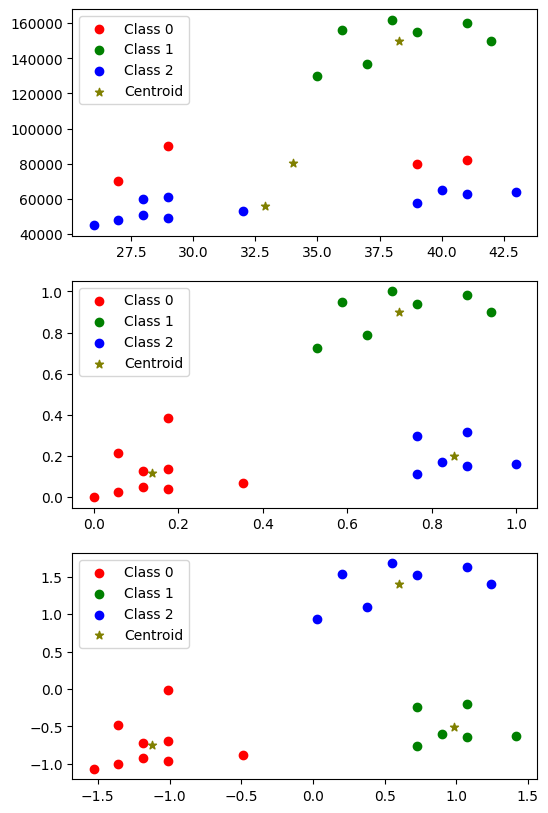

In [13]:
fig, (sub, sub1, sub2) = plt.subplots(nrows=3, figsize=(6, 10))

subplots = [(sub, df_0, df_1, df_2, centroid), 
            (sub1, df_normalized_0, df_normalized_1, df_normalized_2, centroid_nor), 
            (sub2, df_standardized_0, df_standardized_1, df_standardized_2, centroid_std)]

for subplot, df0, df1, df2, centroid in subplots:
    subplot.scatter(df0.Age, df0['Income($)'], color='red', label='Class 0')
    subplot.scatter(df1.Age, df1['Income($)'], color='green', label='Class 1')
    subplot.scatter(df2.Age, df2['Income($)'], color='blue', label='Class 2')
    subplot.scatter(centroid[:, 0], centroid[:, 1], color='olive', marker='*', label='Centroid')
    subplot.legend()

# Elbow Method

In [14]:
variances = []  # sum of squared error
n_clusters = range(2,12)
for i in n_clusters:
    km = KMeans(n_clusters=i)
    km.fit(df_normalized[['Age','Income($)']])
    variances.append(km.inertia_)  # inertia_ is sum of squared error

Text(0, 0.5, 'Sum of Squared Error')

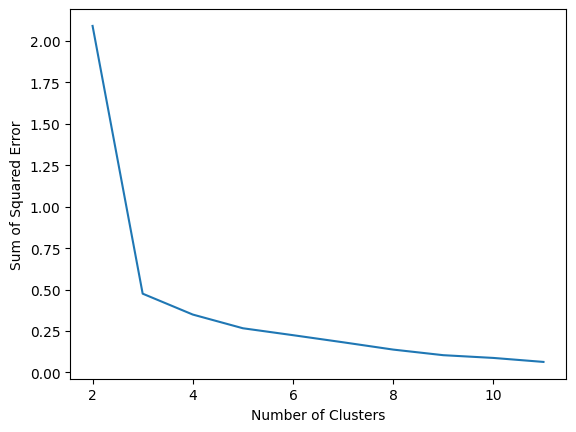

In [15]:
plt.plot(n_clusters, variances)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')

***==> The best number of clusters is 3***